In [57]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from seaborn import color_palette
from pathlib import Path
from scipy.stats import gaussian_kde
import yaml

In [58]:
palette = color_palette()

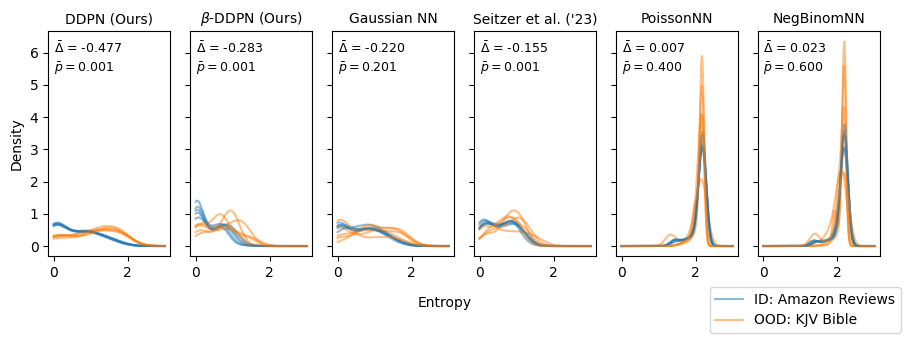

In [82]:
heads = ["ddpn", "beta_ddpn", "gaussian", "beta_gaussian", "poisson", "nbinom"]
names = ["DDPN (Ours)", "$\\beta$-DDPN (Ours)", "Gaussian NN", "Seitzer et al. ('23)", "PoissonNN", "NegBinomNN"]
versions = range(5)
domain = np.linspace(0, 3, num=200)

fig, axs = plt.subplots(1, len(heads), figsize=(9, 3), sharey="row", sharex="row")
for col_num, (head, name) in enumerate(zip(heads, names)):
    deltas = []
    p_vals = []
    for version in versions:
        log_dir = Path(f"../../logs/reviews/{head}/version_{version}")
        reg_entropies = torch.load(log_dir / "reviews_entropies.pt").detach().cpu().numpy()
        ood_entropies = torch.load(log_dir / "bible_entropies.pt").detach().cpu().numpy()
        with open(log_dir / "difference_of_means_results.yaml") as f:
            results = yaml.safe_load(f)
        
        reg_kde = gaussian_kde(reg_entropies, bw_method=0.5)
        ood_kde = gaussian_kde(ood_entropies, bw_method=0.5)
        deltas.append(results["delta"])
        p_vals.append(results["p_val"])
        axs[col_num].plot(domain, reg_kde(domain), color=palette[0], alpha=0.5, label="ID: Amazon Reviews")
        axs[col_num].plot(domain, ood_kde(domain), color=palette[1], alpha=0.5, label="OOD: KJV Bible")

    if col_num == 0:
        axs[col_num].set_ylabel("Density")
    axs[col_num].annotate(f"$\\bar{{\Delta}}$ = {np.mean(deltas):.3f}", (0, 6.0), fontsize=9)
    axs[col_num].annotate(f"$\\bar{{p}} = {np.mean(p_vals):.3f}$", (0, 5.4), fontsize=9)
    axs[col_num].set_title(name, fontsize=10)

handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], bbox_to_anchor=(0.9, -0.05), loc='center')
fig.text(0.5, -0.04, 'Entropy', ha='center')
plt.tight_layout()
plt.show()

In [84]:
fig.savefig("ood_behavior.pdf", format="pdf", dpi=150, bbox_inches='tight')

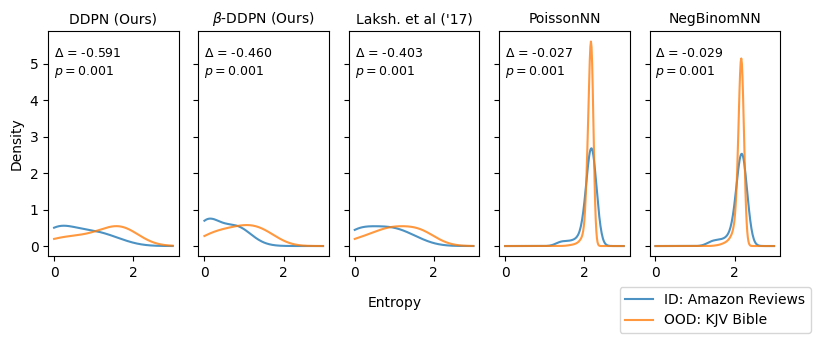

In [89]:
# Ensembles

heads = ["ddpn", "beta_ddpn", "gaussian", "nbinom", "poisson"]
names = ["DDPN (Ours)", "$\\beta$-DDPN (Ours)", "Laksh. et al ('17)", "PoissonNN", "NegBinomNN"]
domain = np.linspace(0, 3, num=200)

fig, axs = plt.subplots(1, len(heads), figsize=(8, 3), sharey="row", sharex="row")
for col_num, (head, name) in enumerate(zip(heads, names)):
    log_dir = Path(f"../../logs/reviews/{head}/ensemble")
    reg_entropies = torch.load(log_dir / "reviews_entropies.pt").detach().cpu().numpy()
    ood_entropies = torch.load(log_dir / "bible_entropies.pt").detach().cpu().numpy()
    with open(log_dir / "difference_of_means_results.yaml") as f:
        results = yaml.safe_load(f)
    
    reg_kde = gaussian_kde(reg_entropies, bw_method=0.7)
    ood_kde = gaussian_kde(ood_entropies, bw_method=0.7)
    axs[col_num].plot(domain, reg_kde(domain), color=palette[0], alpha=0.8, label="ID: Amazon Reviews")
    axs[col_num].plot(domain, ood_kde(domain), color=palette[1], alpha=0.8, label="OOD: KJV Bible")

    if col_num == 0:
        axs[col_num].set_ylabel("Density")
    axs[col_num].annotate(f"$\Delta$ = {results['delta']:.3f}", (0, 5.2), fontsize=9)
    axs[col_num].annotate(f"$p = {results['p_val']:.3f}$", (0, 4.7), fontsize=9)
    axs[col_num].set_title(name, fontsize=10)

handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], bbox_to_anchor=(0.9, -0.05), loc='center')
fig.text(0.5, -0.04, 'Entropy', ha='center')
plt.tight_layout()
plt.show()

In [90]:
fig.savefig("ood_behavior_ensemble.pdf", format="pdf", dpi=150, bbox_inches='tight')